<h2>New York City MTA(metro) customer satisfaction analysis </h2>

In [33]:
## loading libraries
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# loading the dataset
def load_df(filepath):
    df = pd.read_csv(filepath)
    return df

In [35]:
# functions to generate the statistics
def calculate_mean(df, col):
    return df[col].mean() if col in df else None


def calculate_median(df, col):
    return df[col].median() if col in df else None


def calculate_std_dev(df, col):
    return df[col].std() if col in df and len(df[col]) > 1 else 0

In [36]:
def build_graph(
    dataframe,
    x_column,
    y_column,
    title,
    xlabel,
    ylabel,
    color="lightgray",
    jupyter_render=False,
):
    plt.figure(figsize=(12, 8))
    plt.bar(dataframe[x_column], dataframe[y_column], color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis="y")
    if not jupyter_render:
        plt.savefig("bar.png")
    else:
        plt.show()


def build_graph2(
    dataframe,
    x2_col,
    y2_col,
    graph2_title,
    color="navy",
    jupyter_render=False,
):
    plt.figure(figsize=(12, 8))
    plt.bar(dataframe[x2_col], dataframe[y2_col], color=color)
    plt.title(graph2_title)
    plt.grid(axis="y")
    if not jupyter_render:
        plt.savefig("bar2.png")
    else:
        plt.show()

In [37]:
# Parameters for the analysis
filepath = "MTA_NYCT_Stat.csv"
analysis_col = "Total Incoming Calls"
x_col = "Month of Year"
y_col = "Total Incoming Calls"
plot_title = "MTA_Seasonality"
xlabel = "Month of Year"
ylabel = "Total Incoming Calls"
x2_col = "Year"
y2_col = "Social Media Customer Satisfaction Score"
graph2_title = "Social Media Customer Satisfaction Score"

In [38]:
def gen_stat(df, analysis_col):
    mean = calculate_mean(df, analysis_col)
    median = calculate_median(df, analysis_col)
    std_dev = calculate_std_dev(df, analysis_col)
    # Creating a DataFrame for the markdown table
    stats_dict = {
        "Statistic": ["Mean", "Median", "Standard Deviation"],
        "Value": [mean, median, std_dev],
    }
    stats_df = pd.DataFrame(stats_dict)
    return stats_df

In [39]:
def gen_graphs(
    df,
    x_col,
    y_col,
    plot_title,
    xlabel,
    ylabel,
    x2_col,
    y2_col,
    graph2_title,
    jupyter_render=False,
):
    build_graph(
        df,
        x_col,
        y_col,
        plot_title,
        xlabel,
        ylabel,
        color="lightgray",
        jupyter_render=jupyter_render,
    )
    # Distribution of material types
    build_graph2(df, x2_col, y2_col, graph2_title, jupyter_render=jupyter_render)

In [40]:
# Loading the data
df = load_df(filepath)

In [41]:
# Call generate_statistics
gen_stat(df, analysis_col)

,Statistic,Value
0,Mean,68180.704918
1,Median,70568.000000
2,Standard Deviation,14093.932965


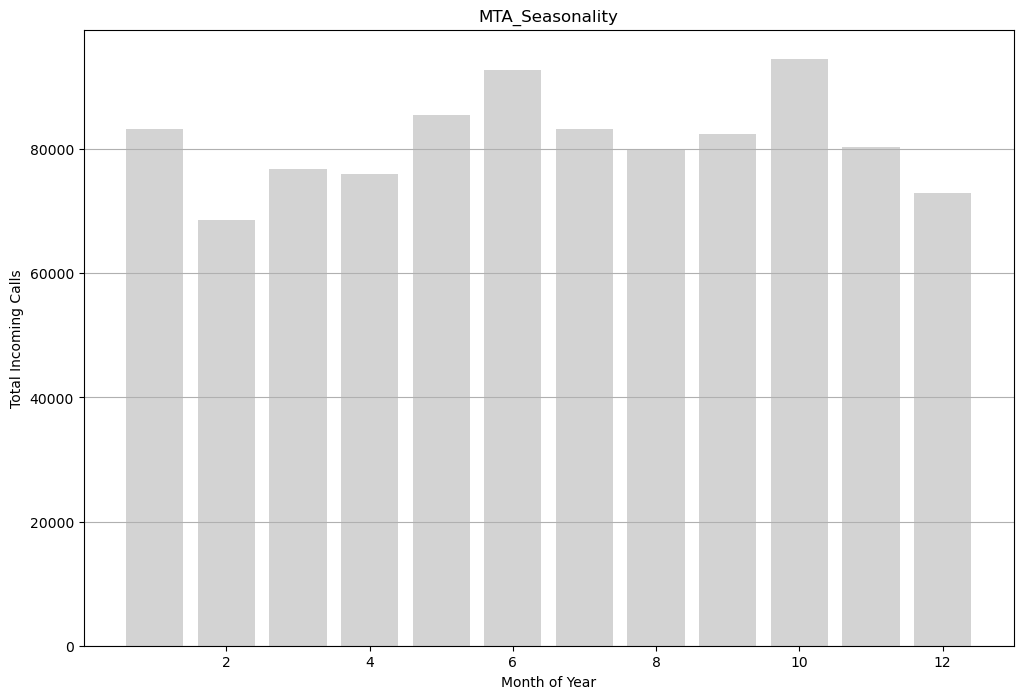

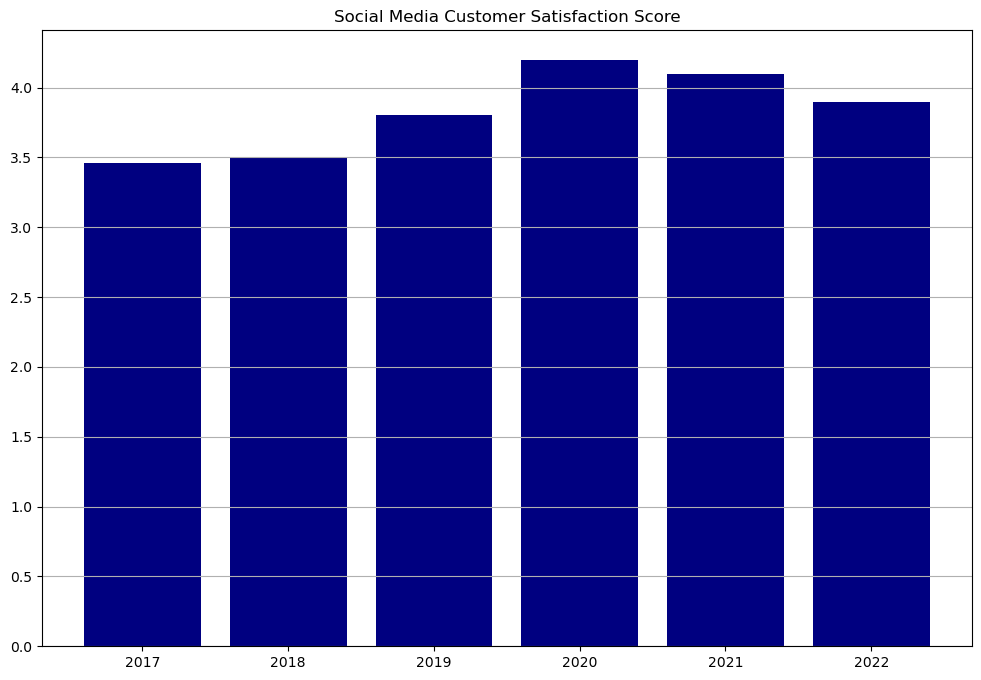

In [42]:
# Call generate_graphs
gen_graphs(
    df,
    x_col,
    y_col,
    plot_title,
    xlabel,
    ylabel,
    x2_col,
    y2_col,
    graph2_title,
    jupyter_render=False,
)